In [8]:
%matplotlib inline
import pandas as pd
import numpy as ny
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

PATH=('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')
experiment_data = pd.read_csv(PATH)
experiment_data.info()
experiment_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [24]:
experiment_data['date'] = pd.DatetimeIndex(experiment_data['timestamp']).date
print(experiment_data.date.unique())

[datetime.date(2017, 1, 21) datetime.date(2017, 1, 12)
 datetime.date(2017, 1, 11) datetime.date(2017, 1, 8)
 datetime.date(2017, 1, 10) datetime.date(2017, 1, 19)
 datetime.date(2017, 1, 17) datetime.date(2017, 1, 4)
 datetime.date(2017, 1, 15) datetime.date(2017, 1, 18)
 datetime.date(2017, 1, 9) datetime.date(2017, 1, 22)
 datetime.date(2017, 1, 24) datetime.date(2017, 1, 23)
 datetime.date(2017, 1, 20) datetime.date(2017, 1, 5)
 datetime.date(2017, 1, 6) datetime.date(2017, 1, 13)
 datetime.date(2017, 1, 7) datetime.date(2017, 1, 3)
 datetime.date(2017, 1, 2) datetime.date(2017, 1, 16)
 datetime.date(2017, 1, 14)]


In [18]:
#Find sample size
print('Control Size:',len(experiment_data[experiment_data.group=='control']))
print('Treatment Size:',len(experiment_data[experiment_data.group=='treatment']))
print('proportion:',experiment_data.converted.mean())

#Signup rate for Treatement and control
print('Test signup rate:',experiment_data[experiment_data.group=='control'].converted.mean())
print('Treatment/Control Signup rate:',experiment_data[experiment_data.group=='treatment'].converted.mean())

#Are they different
stats.ttest_ind(experiment_data[experiment_data.group=='treatment'].converted,
                experiment_data[experiment_data.group == 'control'].converted)

Control Size: 145274
Treatment Size: 145311
proportion: 0.11959667567149027
Test signup rate: 0.1203863045004612
Treatment/Control Signup rate: 0.11880724790277405


Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

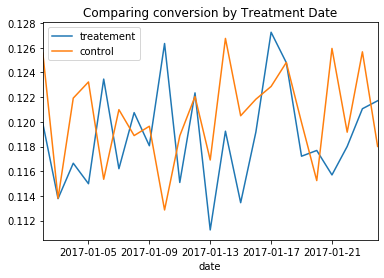

T-results by Date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult(stat

In [38]:
fig = experiment_data[experiment_data.group == 'treatment'][
      ['date','converted']].groupby('date').mean().plot()
experiment_data[experiment_data.group == 'control'][
      ['date','converted']].groupby('date').mean().plot(ax=fig)

plt.legend(['treatement','control'])
plt.title('Comparing conversion by Treatment Date')
plt.show()

print('T-results by Date')
for i in experiment_data.date.unique():
    dated_data = experiment_data[experiment_data.date == i]
    print(stats.ttest_ind(dated_data[dated_data.group =='treatment'].converted,
                          dated_data[dated_data.group == 'control'].converted))
